In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, os, math
from PIL import Image

In [ ]:
#We erode the original tumor mask
#We invert the erosion (So that the eroded tumor mask is black and bakcground in white)
#We find the bitwise AND between inverted mask and original tumor mask
#This gives us the boundary of the tumor mask
#We apply the SLIC algorithm on the boundary mask

### Domain Specific Superpixelization applied to a Pancreatic Tumor Image

Erosion 1


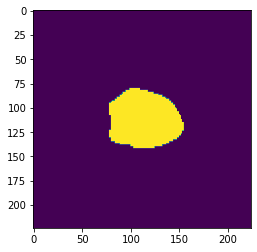

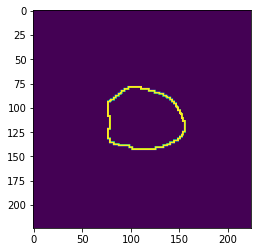

178


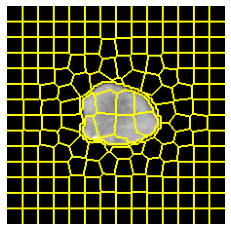

In [8]:
img_path = "traintest4/test2/cropped_pdac_60/088_pdac_preop_Tumor.png"
cv_img = cv2.imread(img_path)
cv_img = cv2.resize(cv_img, (224, 224), interpolation = cv2.INTER_AREA)

gry_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
(thresh, bw) = cv2.threshold(gry_img, 1, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(bw, kernel, iterations=1)
print("Erosion 1")
plt.imshow(img_erosion)
plt.show()

inv = cv2.bitwise_not(img_erosion)
img_bwa = cv2.bitwise_and(inv, bw)

plt.imshow(img_bwa)
plt.show()

rgb_img = cv2.merge((img_bwa, img_bwa, img_bwa))
input_segments = skimage.segmentation.slic(rgb_img.astype('float'), n_segments=205, compactness=20, sigma=0.3,start_label=1)

num_superpixels = np.unique(input_segments).shape[0]
print(num_superpixels)

plt.imshow(skimage.segmentation.mark_boundaries(cv_img, input_segments))
plt.axis('off')
plt.show()
plt.close()

### Domain Specific Superpixelization applied to a Liver Tumor Image

Erosion 1


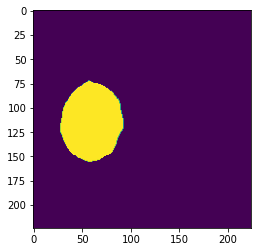

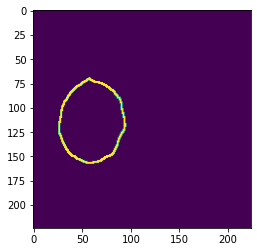

266


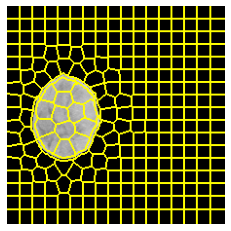

In [10]:
img_path = "test/hcc_images_1/072-hcc_hcctumor1.png"
cv_img = cv2.imread(img_path)
cv_img = cv2.resize(cv_img, (224, 224), interpolation = cv2.INTER_AREA)

gry_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
(thresh, bw) = cv2.threshold(gry_img, 1, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(bw, kernel, iterations=1)
print("Erosion 1")
plt.imshow(img_erosion)
plt.show()

inv = cv2.bitwise_not(img_erosion)
img_bwa = cv2.bitwise_and(inv, bw)

plt.imshow(img_bwa)
plt.show()

rgb_img = cv2.merge((img_bwa, img_bwa, img_bwa))
input_segments = skimage.segmentation.slic(rgb_img.astype('float'), n_segments=305, compactness=20, sigma=0.3,start_label=1)

num_superpixels = np.unique(input_segments).shape[0]
print(num_superpixels)

plt.imshow(skimage.segmentation.mark_boundaries(cv_img, input_segments))
plt.axis('off')
plt.show()
plt.close()
#072-hcc_hcctumor1.png, 058-hcc_hcctumor1.png 305